<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-их-просмотр" data-toc-modified-id="Загрузка-данных-и-их-просмотр-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и их просмотр</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Разбивка-на-выборки" data-toc-modified-id="Разбивка-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разбивка на выборки</a></span></li><li><span><a href="#Кодирование" data-toc-modified-id="Кодирование-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Кодирование</a></span></li><li><span><a href="#Масштабирование-данных" data-toc-modified-id="Масштабирование-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Масштабирование данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Изменение-веса-классов" data-toc-modified-id="Изменение-веса-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изменение веса классов</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>SMOTE</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Описание проекта: из «Бета-Банка» стали уходить клиенты каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Цель проекта: построить модель с предельно большим значением *F1*-меры. Будем считать цель выполненной, когда *F1*-мера будет больше 0.59. 

Дополнительно измерим *AUC-ROC* и сравним её значение с *F1*-мерой.
Описание столбцов:
- Признаки:
 - RowNumber — индекс строки в данных
 - CustomerId — уникальный идентификатор клиента
 - Surname — фамилия
 - CreditScore — кредитный рейтинг
 - Geography — страна проживания
 - Gender — пол
 - Age — возраст
 - Tenure — сколько лет человек является клиентом банка
 - Balance — баланс на счёте
 - NumOfProducts — количество продуктов банка, используемых клиентом
 - HasCrCard — наличие кредитной карты
 - IsActiveMember — активность клиента
 - EstimatedSalary — предполагаемая зарплата
 
 
- Целевой признак:
 - Exited — факт ухода клиента

Наметим план проекта:
- Откроем файл с данными и изучим его. 
- Подготовим данные. 
 - Закодируем категориальные данные.
 - Масштабируем численные данные.
 - Разобьём данные на выборки.
- В процессе изучим баланс классов.
- Изучим модели без учёта дисбаланса классов.
- Применим методы борьбы с дисбалансом классов.
- Подберём лучшую модель и её гиперпараметры.
- Проверим качество модели на тестовой выборке.
- Исследуем метрику *AUC-ROC*.
- Проверим модель на вменяемость.  

## Загрузка данных и их просмотр

In [2]:
!pip install scikit-learn==1.1.3
!pip install imblearn

import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

Загрузим все необходимые нам для работы библиотеки и их разделы. 

In [3]:
try :
    df = pd.read_csv('C:/Users/Ivan Govnov/Downloads/Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')
    
display(df.head())
df.info(verbose=None)
df.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


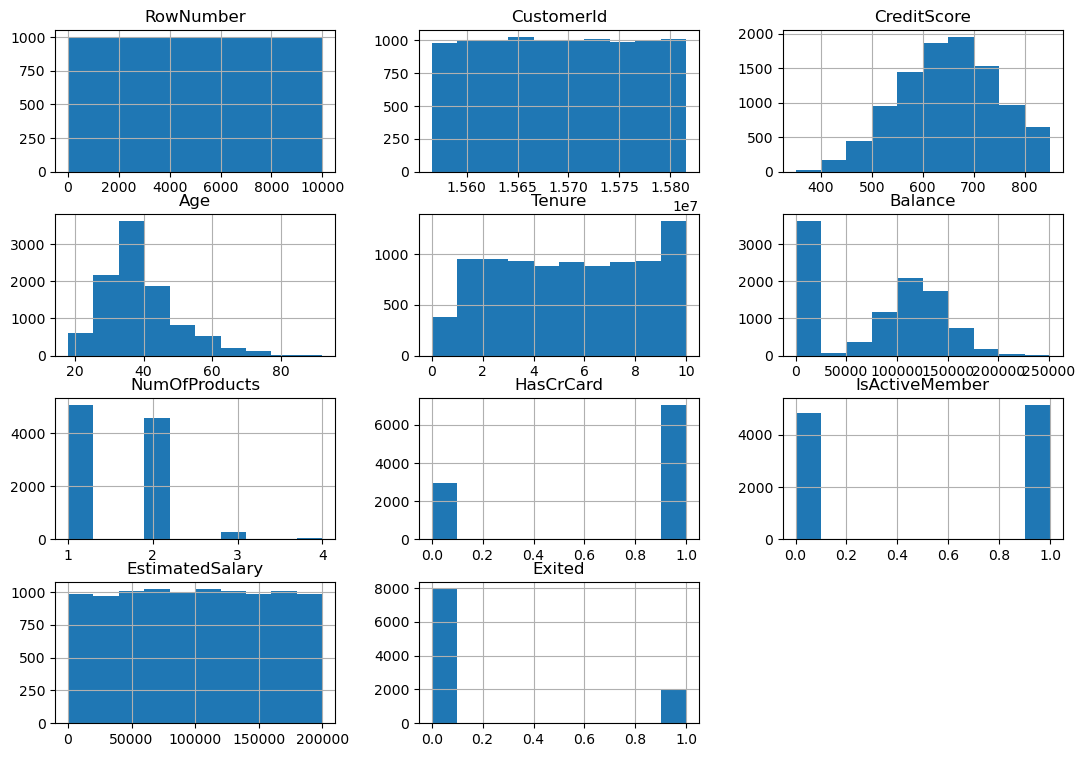

In [4]:
df.hist(figsize=(13, 9))
plt.show()

Мы загрузили датафрейм и видим основную информацию о нём. В датафрейме 14 столбцов и 10000 строк. Столбец `Tenure` позже рассмотрим отдельно, в нём не хватает данных.

На графиках представлены распределения значений.
Из интересных наблюдений по предоставленным данным отметим следующие:
- Средний кредитный рейтинг 650.
- Самому старому клиенту 92, самому молодому 18, а средний возраст почти 39 лет.
- В среднем каждый клиент банка является его клиентом уже 5 лет.
- Больше, чем у трети клиентов пустой баланс. У самого богатого на счету 250898.
- Судя по всему в банке всего 4 продукта. Почти у всех клиентов либо 1, либо 2 продукта банка.
- Примерно 70% клиентов имеют кредитную карту банка.
- Чуть больше половины клиентов имеют статус "активный".
- Средняя предполагаемая зарплата 100090, медиана 100193. Квантили показывают очень ровное распределение зарплат, что не очень похоже на правду. Возможно, алгоритм, предсказывающий зарплату отрабатывает свою функцию неправильно, об этом говорит и самая низкая предсказанная зарплата 11.58. Не будем удалять столбец с предсказываемой зарплатой. График показывает равномерное распределение зарплат, как не происходит в действительности, а в реальности предсказанные зарплаты должны быть распределены нормально и пик был бы на медиане. Тем не менее, вероятно, клиенты были отобраны равномерно из разных групп по предсказываемой зарплате.
- Соотношение оставшихся клиентов к ушедшим равно 4:1, что свидетельствует о дисбалансе и может сказаться на качестве обучения модели.

Первый взгляд на данные сделан, приступим к их подготовке.

## Подготовка данных

In [5]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Удалим столбцы обозначающие номер строчки, айди клиента и его фамилию, так как они не влияют на факт ухода клиента.

In [6]:
print(df['Tenure'].unique())
df.loc[df['Tenure'].isna(), 'Tenure'] = -1

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


В столбце `Tenure` присутствуют пропущенные значения, которые могут быть следствием потерь данных. Заменим пропуски на значение-заглушку. Предположительно это лучшее решение, так как если пропуски не звязаны с технической часть, то лучше поставить одно значение для таких данных.

### Разбивка на выборки

In [7]:
target = df['Exited']
features = df.drop('Exited', axis=1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.15, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.17647, random_state=12345)

Мы разбили данные на тренировочную, валидационную и тестовую в соотношении 70/15/15

In [8]:
print('Тренировочние выборки:', features_train.shape, target_train.shape)
print('Валидационные выборки:', features_valid.shape, target_valid.shape)
print('Тренировочные выборки:', features_test.shape, target_test.shape)

Тренировочние выборки: (7000, 10) (7000,)
Валидационные выборки: (1500, 10) (1500,)
Тренировочные выборки: (1500, 10) (1500,)


### Кодирование

In [9]:
features_train.info

<bound method DataFrame.info of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
7702          850    France    Male   31     8.0       0.00              2   
4439          613    France  Female   21     7.0  105627.95              1   
5676          749    France  Female   26     6.0       0.00              2   
1611          760   Germany  Female   49     9.0   91502.99              1   
9749          533    France  Female   35     8.0       0.00              2   
...           ...       ...     ...  ...     ...        ...            ...   
1891          584    France  Female   37     1.0       0.00              2   
36            490     Spain    Male   31     3.0  145260.23              1   
9393          670   Germany    Male   43     9.0  111677.88              1   
207           618    France    Male   34     5.0  134954.53              1   
7499          609   Germany  Female   71     6.0  113317.10              1   

      HasCrCard  IsActiveMember

In [10]:
cat_col = features_train.select_dtypes(include='object').columns.to_list()

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

encoder.fit(features_train[cat_col])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

Мы обучили `OneHotEncoder` на тренировочной выборке, теперь применим его к нашим данным.

In [9]:
features_train[
    encoder.get_feature_names_out()
] = encoder.transform(features_train[cat_col])
features_train.drop(cat_col, axis=1, inplace=True)

features_valid[
    encoder.get_feature_names_out()
] = encoder.transform(features_valid[cat_col])
features_valid.drop(cat_col, axis=1, inplace=True)

features_test[
    encoder.get_feature_names_out()
] = encoder.transform(features_test[cat_col])
features_test.drop(cat_col, axis=1, inplace=True)

display(features_train.head(), features_valid.head(), features_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7702,850,31,8.0,0.00,2,1,0,178667.70,0.0,0.0,1.0
4439,613,21,7.0,105627.95,1,1,1,36560.51,0.0,0.0,0.0
5676,749,26,6.0,0.00,2,0,1,34948.77,0.0,0.0,0.0
1611,760,49,9.0,91502.99,1,1,0,117232.90,1.0,0.0,0.0
9749,533,35,8.0,0.00,2,1,1,187900.12,0.0,0.0,0.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5113,754,47,1.0,185513.67,1,1,0,27438.83,0.0,0.0,0.0
418,643,46,6.0,0.00,2,0,0,106781.59,0.0,0.0,0.0
2710,634,37,1.0,89696.84,2,1,1,193179.88,1.0,0.0,1.0
5000,834,68,9.0,130169.27,2,0,1,93112.20,1.0,0.0,0.0
3760,835,38,7.0,86824.09,1,0,0,175905.97,0.0,1.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7867,640,46,3.0,0.00,1,1,1,156260.08,0.0,1.0,0.0
1402,757,29,8.0,130306.49,1,1,0,77469.38,0.0,0.0,1.0
8606,807,42,5.0,0.00,2,1,1,74900.90,0.0,1.0,1.0
8885,668,45,4.0,102486.21,2,1,1,158379.25,0.0,1.0,1.0
6494,699,28,7.0,0.00,2,1,1,22684.78,0.0,0.0,1.0


Данные закодированы, изначальные столбцы удалены. Время масштабировать данные.

### Масштабирование данных

In [10]:
numeric = ['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary','Tenure']

Создадим список столбцов с численными данными, чтобы масштабировать признаки.

In [11]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

Обучаем `StandartScaler` на тренировочной выборке.

In [12]:
features_train[numeric] = scaler.transform(features_train[numeric])
    
features_valid[numeric] = scaler.transform(features_valid[numeric])
    
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_train.head(), features_valid.head(), features_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7702,2.066175,-0.748587,1.090872,-1.225643,0.812901,1,0,1.360281,0.0,0.0,1.0
4439,-0.393134,-1.695550,0.783967,0.465596,-0.896413,1,1,-1.108208,0.0,0.0,0.0
5676,1.018115,-1.222069,0.477062,-1.225643,0.812901,0,1,-1.136205,0.0,0.0,0.0
1611,1.132260,0.955945,1.397778,0.239437,-0.896413,1,0,0.293121,1.0,0.0,0.0
9749,-1.223280,-0.369802,1.090872,-1.225643,0.812901,1,1,1.520654,0.0,0.0,0.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5113,1.069999,0.766553,-1.057464,1.744668,-0.896413,1,0,-1.266658,0.0,0.0,0.0
418,-0.081829,0.671856,0.477062,-1.225643,0.812901,0,0,0.111575,0.0,0.0,0.0
2710,-0.175220,-0.180410,-1.057464,0.210518,0.812901,1,1,1.612366,1.0,0.0,1.0
5000,1.900146,2.755174,1.397778,0.858533,0.812901,0,1,-0.125871,1.0,0.0,0.0
3760,1.910523,-0.085714,0.783967,0.164522,-0.896413,0,0,1.312308,0.0,1.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7867,-0.112959,0.671856,-0.443653,-1.225643,-0.896413,1,1,0.971047,0.0,1.0,0.0
1402,1.101130,-0.937980,1.090872,0.860731,-0.896413,1,0,-0.397596,0.0,0.0,1.0
8606,1.619971,0.293071,0.170157,-1.225643,0.812901,1,1,-0.442212,0.0,1.0,1.0
8885,0.177592,0.577160,-0.136748,0.415292,0.812901,1,1,1.007858,0.0,1.0,1.0
6494,0.499274,-1.032676,0.783967,-1.225643,0.812901,1,1,-1.349238,0.0,0.0,1.0


Числовые данные масштабированны, а качественные закодированы.

В результате подготовки данных мы 
- Разбили исходные данные на три выборки в соотношении 70/15/15.
- Удалили 3 столбца.
- Поставили значение-заглушку в столбце `Tenure`.
- Закодировали 2 столбца, избежав дамми-ловушки.
- Масштабировали данные, где это необходимо.

Данные готовы к исследованию наших задач, можно приступать.

## Исследование задачи

### LogisticRegression

In [13]:
params = { 'penalty': ['l1', 'l2', 'elasticnet', None],
           'C': [0, 0.2, 0.5, 0.7, 1],
           'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

lg_model = LogisticRegression(random_state=12345)
grid = GridSearchCV(lg_model, params, scoring = 'f1', cv=5)
grid.fit(features_train, target_train)

grid.best_params_

{'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}

Для получения лучших гиперпараметров будем и дальше использовать инструмент `GridSearchCV`, который автоматически подбирает лучшие гиперпараметры модели из предложенных. Посмотрим на метрики `f1` и `AUC-ROC` для линейной регрессии с лучшими гиперпараметрами.

In [14]:
lg_model = LogisticRegression(penalty='l2', C=0.5, solver='liblinear', random_state=12345)
lg_model.fit(features_train, target_train)
probabilities_valid = lg_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = lg_model.predict(features_valid)

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid), '\n'
      'f1:', f1_score(target_valid, predicted_valid))

AUC-ROC: 0.7579299841387165 
f1: 0.3098591549295775


`LogisticRegression` показывает чрезвычайно низкую метрику `f1`. Продолжим наше исследование моделей.

### DecisionTreeClassifier

In [15]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(6, 19),
          'min_samples_split': range(1, 4),
          'min_samples_leaf': range(1, 8)}

dtc_model = DecisionTreeClassifier(random_state=12345)
grid = GridSearchCV(dtc_model, params, scoring = 'f1', cv=5)
grid.fit(features_train, target_train)

grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [16]:
dtc_model = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=1, 
                                   min_samples_split=2, random_state=12345)
dtc_model.fit(features_train, target_train)
probabilities_valid = dtc_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = dtc_model.predict(features_valid)

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid), '\n'
      'f1:', f1_score(target_valid, predicted_valid))

AUC-ROC: 0.8242935415904948 
f1: 0.5590551181102362


`DecisionTreeClassifier` показывает себя намного лучше, чем `LogisticRegression` и мы почти получили нужный показатель метрики. Будем пробовать дальше.

### RandomForestClassifier

In [17]:
params = {'n_estimators': [30, 46, 5],
          'criterion': ['gini', 'entropy'],
          'max_depth': range(6, 22, 3),
          'min_samples_split': range(1, 4),
          'min_samples_leaf': range(1, 6)}

rfc_model = RandomForestClassifier(random_state=12345)
grid = GridSearchCV(rfc_model, params, scoring = 'f1', cv=5)
grid.fit(features_train, target_train)

grid.best_params_

{'criterion': 'gini',
 'max_depth': 21,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 30}

In [18]:
rfc_model = RandomForestClassifier(criterion='gini', max_depth=21, min_samples_leaf=2, 
                                   min_samples_split=2, n_estimators=30, random_state=12345)
rfc_model.fit(features_train, target_train)
probabilities_valid = rfc_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = rfc_model.predict(features_valid)

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid), '\n'
      'f1:', f1_score(target_valid, predicted_valid))

AUC-ROC: 0.8598236056932276 
f1: 0.5884615384615385


Ни одна из моделей не достигает достаточной метрики `f1`. Скорее всего причина этому кроется в дисбалансе классов. На одном из графиков столбца целевого признака `Exited` в самом начале видно соотношение оставшихся клиентов к ушедшим 1:4. 

## Борьба с дисбалансом

### Изменение веса классов

Для начала попробуем применить метод изменения веса классов, для этого установим гиперпараметр `class_weight='balanced'`. `LogisticRegression` ранее показал крайне низкие результаты, поэтому далее мы не будем использовать эту модель.

#### DecisionTreeClassifier

In [19]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(6, 19),
          'min_samples_split': range(1, 4),
          'min_samples_leaf': range(1, 8),
          'class_weight': ['balanced']
         }

dtc_model = DecisionTreeClassifier(random_state=12345)
grid = GridSearchCV(dtc_model, params, scoring = 'f1', cv=5)
grid.fit(features_train, target_train)

grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 2}

In [20]:
dtc_model = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=7, 
                                   min_samples_leaf=7, min_samples_split=2, random_state=12345)

dtc_model.fit(features_train, target_train)
probabilities_valid = dtc_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = dtc_model.predict(features_valid)

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid), '\n'
      'f1:', f1_score(target_valid, predicted_valid))

AUC-ROC: 0.8478066449045298 
f1: 0.6026731470230863


Метод взвешивания классов показал улучшение метрики `f1`. Показатель метрики достиг цели.

#### RandomForestClassifier

In [21]:
params = {'n_estimators': [30, 46, 5],
          'criterion': ['gini', 'entropy'],
          'max_depth': range(6, 22, 3),
          'min_samples_split': range(1, 4),
          'min_samples_leaf': range(1, 7),
          'class_weight': ['balanced']}

rfc_model = RandomForestClassifier(random_state=12345)
grid = GridSearchCV(rfc_model, params, scoring = 'f1', cv=5)
grid.fit(features_train, target_train)

grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 46}

In [22]:
rfc_model = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth=15, 
                                   min_samples_leaf=4, min_samples_split=2, n_estimators=46, 
                                   random_state=12345)

rfc_model.fit(features_train, target_train)
probabilities_valid = rfc_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = rfc_model.predict(features_valid)

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid), '\n'
      'f1:', f1_score(target_valid, predicted_valid))

AUC-ROC: 0.8685354748258021 
f1: 0.6396103896103896


Изменение гиперпараметра `class weight` для `RandomForestClassifier` дало значительный прирост метрики `f1`.

Предположение о том, что дисбаланс классов оказывает негативное влияние на обучение наших моделей подтвердилось, использование гиперпараметра `class weght='balanced'` оправдано. Попробуем увеличить метрику ещё больше, применив метод `SMOTE`.

### SMOTE

In [23]:
sm = SMOTE(sampling_strategy = 'auto',
            k_neighbors=5,
            random_state=12345)
features_train_sm, target_train_sm = sm.fit_resample(features_train, target_train) 

Применяя метод SMOTE мы избавляемся от дисбаланса классов. Посмотрим на значения целевого признака.

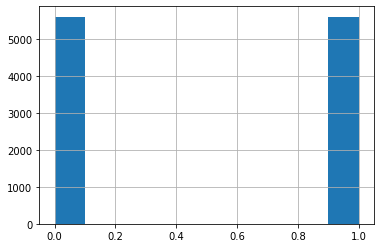

In [24]:
target_train_sm.hist()
plt.show()

Мы избавились от дисбаланса классов, посмотрим, как это повлияло на эффективность выбранной модели.

#### DecisionTreeClassifier

In [25]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(6, 19),
          'min_samples_split': range(1, 4),
          'min_samples_leaf': range(1, 8)}

dtc_model = DecisionTreeClassifier(random_state=12345)
grid = GridSearchCV(dtc_model, params, scoring = 'f1', cv=5)
grid.fit(features_train_sm, target_train_sm)

grid.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [26]:
dtc_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, 
                                   min_samples_leaf=1, min_samples_split=2, random_state=12345)
dtc_model.fit(features_train_sm, target_train_sm)
probabilities_valid = dtc_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = dtc_model.predict(features_valid)

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid), '\n'
      'f1:', f1_score(target_valid, predicted_valid))

AUC-ROC: 0.7306488396011268 
f1: 0.5472779369627506


После балансировки классов метрика `f1` существенно упала.

#### RandomForestClassifier

In [27]:
params = {'n_estimators': [30, 46, 5],
          'criterion': ['gini', 'entropy'],
          'max_depth': range(6, 22, 3),
          'min_samples_split': range(1, 4),
          'min_samples_leaf': range(1, 7)}

rfc_model = RandomForestClassifier(random_state=12345)
grid = GridSearchCV(rfc_model, params, scoring = 'f1', cv=5)
grid.fit(features_train_sm, target_train_sm)

grid.best_params_

{'criterion': 'gini',
 'max_depth': 21,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 46}

In [28]:
rfc_model = RandomForestClassifier(criterion='gini', max_depth=21, 
                                   min_samples_leaf=1, min_samples_split=2, n_estimators=46, 
                                   random_state=12345)

rfc_model.fit(features_train_sm, target_train_sm)
probabilities_valid = rfc_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = rfc_model.predict(features_valid)

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid), '\n'
      'f1:', f1_score(target_valid, predicted_valid))

AUC-ROC: 0.849202069594998 
f1: 0.6260296540362439


Метрика уменьшилась также, как и у `DecisionTreeClassifier`.

Использование метода SMOTE не дало положительных результатов. Его использование неоправдано. Время проверить модель на тестовой выборке.

## Тестирование модели

In [29]:
rfc_model = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth=15, 
                                   min_samples_leaf=4, min_samples_split=2, n_estimators=46, 
                                   random_state=12345)

rfc_model.fit(features_train, target_train)
probabilities_test = rfc_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = rfc_model.predict(features_test)

print('AUC-ROC:', roc_auc_score(target_test, probabilities_one_test), '\n'
      'f1:', f1_score(target_test, predicted_test))

AUC-ROC: 0.8625543905954638 
f1: 0.6287625418060201


`RandomForestClassifier` Прошёл тест, его `f1-мера` составила примерно 0.625, что удовлетворяет поставленную нами цель. Также эта модель имеет высокую `AUC-ROC` метрику, что свидетельствует о хорошем соотношении `precision` и `recall`. Ради интереса исследуем `accuracy` полученной модели и проверим её на адекватность.

# Проверка модели на адекватность

In [30]:
predicted_test = rfc_model.predict(features_test)
print(accuracy_score(target_test, predicted_test))

0.852


`accuracy` лучшей моделие составила 85,2%, что, кажется, весьма неплохо, посмотрим, какой результат даст модель-пустышка.

In [31]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(features_train, target_train)
accident = dummy.score(features, target)
print(accident)

0.7963


`dummy-модель` показала `accuracy` 79,6%. Наша модель отрабатывает по метрике accuracy всего на 5,57% лучше, но для бизнеса важен каждый процент.

Модель работает адекватно.

# Заключение

В процессе разработки лучшей модели мы 
- Подготовили данные 
- Изучили, как ведут себя 3 разных модели на наших данных
- Использовали 2 метода борьбы с дисбалансом классов (в итоге применили 1)
- Выбрали лучшую модель и проверили её на адекватность, изучив различные метрики

Лучшая модель: RandomForestClassifier


Её гиперпараметры:
- 'class_weight': 'balanced'
- 'criterion': 'gini'
- 'max_depth': 15
- 'min_samples_leaf': 4
- 'min_samples_split': 2
- 'n_estimators': 46

В результате нам удалось достичь следующих показателей метрик на тестовой выборке:
- `f1`: 0.6287625418060201
- `AUC-ROC`: 0.8625543905954638 
- `accuracy`: 0.852


Изначальная цель проекта выполнена.